### Missing data
Why do we have missing data in our dataset?
1. Lack of information in a specific domain
2. People may not have answered
3. Errors in the collection 

Based on that, it's important to not depend on a single data source!

Once we have data coming from multiple sources, we may still have missing data and this data can be split into two main categories:
1. Continuous data
2. Discrete data (aka categorical data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

### What is Missing completely at random (MCAR)?
Data is MCAR when the probability of getting a missing value is the same for any record. Beyond that, data is MCAR if there is absolutely no relationship between the missing values and any other values (observed or mssing).

Age and cabin are not missing at random since the data have been collected after the accident had happened and those information could not be retrieved.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### The oposite of MCAR is Systematic missing value
There is some relationship between the missing value and any other value (observed or missing).

In [6]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [7]:
df.cabin_null.mean()

0.7710437710437711

The majority of missing cabins corresponds to those who died which is True

In [13]:
df.groupby('Survived').agg({'cabin_null':'mean'})

cabin_null
Survived            
0           0.876138
1           0.602339

### Techniques for handling missing values
1. Mean/median/mode replacement
2. Random sample imputation
3. Capture of NaN values with a new feature
4. End of Distribuition imputation
5. Arbitrary Imputation
6. Frequent category imputation

### 1. Mean/median
1. Mean and median are used with continuous data and data is MCAR
2. We need to be careful with mean since it can be heavily affected by outliers

In [44]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [45]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [46]:
## Percentage of missing values
df.isnull().sum()/df.shape[0]

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

## Using the median

In [47]:
def impute_missing(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

In [48]:
median = df['Age'].median()

In [49]:
median

28.0

In [50]:
impute_missing(df,'Age',median)

In [51]:
df

Survived   Age     Fare  Age_median
0           0  22.0   7.2500        22.0
1           1  38.0  71.2833        38.0
2           1  26.0   7.9250        26.0
3           1  35.0  53.1000        35.0
4           0  35.0   8.0500        35.0
..        ...   ...      ...         ...
886         0  27.0  13.0000        27.0
887         1  19.0  30.0000        19.0
888         0   NaN  23.4500        28.0
889         1  26.0  30.0000        26.0
890         0  32.0   7.7500        32.0

[891 rows x 4 columns]

As we can see the mean of both distribuitions is basically the same whereas the standard deviation after replacing the missing values with the median became lower (narrowed curve - blue)

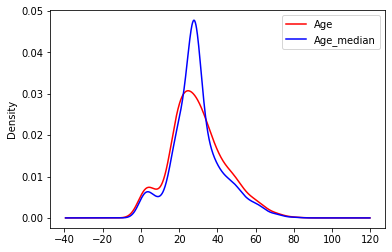

In [58]:
df['Age'].plot(kind='kde',color='red')
df['Age_median'].plot(kind='kde',color='blue')
plt.legend()

## Using the mean

In [59]:
def impute_missing(df,variable,mean):
    df[variable+'_mean'] = df[variable].fillna(mean)

In [60]:
mean = df['Age'].mean()

In [61]:
mean

29.69911764705882

In [62]:
impute_missing(df,'Age',mean)

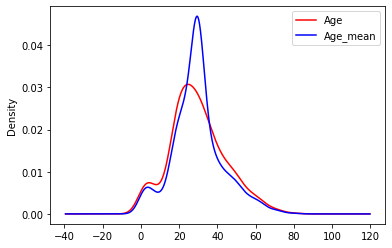

In [64]:
df['Age'].plot(kind='kde',color='red')
df['Age_mean'].plot(kind='kde',color='blue')
plt.legend()

In [65]:
df.describe()

Survived         Age        Fare  Age_median    Age_mean
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838   29.699118   32.204208   29.361582   29.699118
std      0.486592   14.526497   49.693429   13.019697   13.002015
min      0.000000    0.420000    0.000000    0.420000    0.420000
25%      0.000000   20.125000    7.910400   22.000000   22.000000
50%      0.000000   28.000000   14.454200   28.000000   29.699118
75%      1.000000   38.000000   31.000000   35.000000   35.000000
max      1.000000   80.000000  512.329200   80.000000   80.000000

## Advantages and Disadvantages of using mean/median replacement
## Advantages:
    - Fast implementation
    - Median is robust to outliers
    - Mean must be analysed before being used since it's heavily affected by outliers
## Disadvantages:
    - The transformed variable may be distorted because of the change on the variance